In [ ]:
#Author: Otávio Joaquim Tavares

<h1 style="text-align:center">
<img src="https://blog.nelogica.com.br/wp-content/uploads/2018/11/O-que-é-e-como-operar-na-Bolsa-de-Valores.png" style="width:900px;height:400px;">

## Conteúdo

1. Introdução
 1. Módulos
2. Ajustando dados para os modelos de Machine Learning
 1. Escala
3. Featute Selection
 1. Seleção Univariada
 2. Eliminação Recursiva de Atributos
 3. Método Ensemble
4. Divisão dos dados
5. Avaliando a Performance
 1. Curva ROC
 2. Acurácia
 3. Precisão
 4. Recall
6. Modelos de Machine Learning
 1. Logistic Regression
 2. Extra Tree Classifier
 3. Decision Tree Classifier
 4. Kneighbors Classifier
 5. Linear Discriminant Analysis
 6. Gaussian NB
 7. Suport Vector Machine
7. Otimização de Performance com Métodos Ensemble
 1. Bagged Decision Trees
 2. Random Forest
 3. AdaBoost
 4. Gradient Boosting 
 5. XGboost
8. Conclusão

# 1 - Introducão

*Este projeto teve como intuito criar um modelo preditivo capaz de classificar se a empresa AMZN negociada na Nasdaq alcança nos próximos 10 dias uma valorização de no mínimo 4% e que não desvalorize mais que 2,5%*

## 1.1 - Módulos

*Além dos módulos utilizados, foi utilizado uma personalização externa:*

**"personalestilo-1.mplstyle"**

In [ ]:
import pandas as pd
import plotly.express as px
import datetime
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time

#Normalização dos dados
from sklearn.preprocessing import MinMaxScaler

#Seleção de variáveis
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier

#Divisão de dados
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

#Modelos de Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#Métricas
from sklearn.model_selection import cross_val_score
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

#Otimização Performance com Métodos Ensemble
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier


# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
import matplotlib.gridspec as gridspec


#Estilo seaborn
sns.set_style(style="darkgrid")
#Estilização MatPlotLib
plt.style.use("personalestilo-1.mplstyle")

import warnings
warnings.filterwarnings('ignore')



Bad key "axes.color_cycle" on line 9 in
personalestilo-1.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.2.2/matplotlibrc.template
or from the matplotlib source distribution


# Ajustes sobre o DataFrame

*Para abrir o arquivo .csv foi utilizado como separador " ; " e foi ajustado o divisor de casas decimais utilizando " , ".*

*Foi necessário pois o default do pacote pandas utiliza o " . " como divisor de casas decimais.*

In [ ]:
df = pd.read_csv('AMZN ATUALIZADO.csv', sep=";", decimal=",")
df.head()

,date,ticker,ALPHA_OVERRIDABLE,ASSET_CVRG_RATIO,BB_1YR_DEFAULT_PROB,BB_2Y_DEFAULT_PROB,BB_3Y_DEFAULT_PROB,BB_4Y_DEFAULT_PROB,BB_5Y_DEFAULT_PROB,BEST_ANALYST_RATING,BEST_BPS,BEST_CPS,BEST_CUR_EV_TO_EBITDA,BEST_EBIT,BEST_EBITDA,BEST_EPS,BEST_EPS_GAAP,BEST_EPS_MEDIAN,BEST_EPS_NUMEST,BEST_NET_DEBT,BEST_NET_INCOME,BEST_OPP,BEST_PEG_RATIO,BEST_PE_RATIO_GAAP,BEST_ROE,BEST_SALES,BEST_TARGET_PRICE,BETA_ADJ_OVERRIDABLE,BETA_STD_DEV_ERR_OVERRIDABLE,BLOOMBERG_ISSUER_DEFAULT_SCORE,CAPITAL_EXPEND,CAP_EXPEND_RATIO,CASH_RATIO,CFO_TO_AVG_CURRENT_LIABILITIES,CF_CASH_FROM_OPER,CF_FREE_CASH_FLOW,COUNTRY_RISK_DIVIDEND_YIELD,COUNTRY_RISK_GROWTH_RATE,COUNTRY_RISK_MARKET_RETURN,COUNTRY_RISK_PAYOUT_RATIO,...,PX_BID,PX_ERN_RATIO_WITH_LOW_CLOS_PX,PX_HIGH,PX_LAST,PX_LOW,PX_MID,PX_OFFICIAL_CLOSE,PX_OPEN,PX_TO_CASH_FLOW,PX_TO_EBITDA,PX_TO_EPS_BEFORE_ABNORMAL_ITEMS,PX_TO_FREE_CASH_FLOW,PX_TO_SALES_RATIO,PX_TO_TANG_BV_PER_SH,PX_VOLUME,QUICK_RATIO,REL_SHR_PX_MOMENTUM,RISK_PREMIUM,RSK_BB_IMPLIED_CDS_SPREAD,SALES_GROWTH,SALES_REV_TURN,SHORT_AND_LONG_TERM_DEBT,T12M_DIL_PE_CONT_OPS,TOTAL_DEBT_TO_EV,TOT_ANALYST_REC,TOT_BUY_REC,TOT_DEBT_TO_COM_EQY,TOT_DEBT_TO_TOT_ASSET,TOT_HOLD_REC,TOT_SELL_REC,VAR_SWAP_12M_LV,VOLATILITY_20D,VOLATILITY_260D,VOLATILITY_30D,VOLATILITY_360D,VOLATILITY_90D,VWAP_VOLUME,WACC_COST_DEBT,WACC_COST_EQUITY,Variavel_resposta
0,04/01/2010 00:00,AMZN US Equity,0.1715,"13,6285",0.000037,0.000825,0.002652,0.005014,0.007627,4.182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,140.684,1.0592,0.0586,2.0,-137,"19,0511","0,8645","0,5437",2610,2473,1.8906,10.2335,10.3891,29.7606,...,133.84,63.7807,136.610,133.90,133.14,133.865,0.0,136.25,17.8448,38.3023,62.3873,20.1517,2.3726,14.7779,7600543.0,"0,9986",34.614,6.6138,15.0,"41,9899",9519,393,63.7807,"0,0073",33.0,21.0,"7,4757","2,8451",11.0,1.0,0.0,30.306,50.813,30.699,62.903,51.529,7526997.0,3.2031,10.4506,NaN
1,05/01/2010 00:00,AMZN US Equity,0.1726,"13,6285",0.000036,0.000805,0.002602,0.004930,0.007515,4.182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,143.053,1.0593,0.0586,2.0,-137,"19,0511","0,8645","0,5437",2610,2473,1.8836,10.2093,10.2876,29.7550,...,134.71,64.1570,135.479,134.69,131.81,134.730,0.0,133.43,17.9501,38.5283,62.7554,20.2706,2.3866,14.8651,8856456.0,"0,9986",34.798,6.6138,15.0,"41,9899",9519,393,64.1570,"0,0073",33.0,21.0,"7,4757","2,8451",11.0,1.0,0.0,28.984,50.771,30.708,62.899,51.529,8842893.0,3.2031,10.4506,NaN
2,06/01/2010 00:00,AMZN US Equity,0.1685,"13,6285",0.000035,0.000793,0.002573,0.004885,0.007458,4.182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,143.053,1.0592,0.0586,2.0,-137,"19,0511","0,8645","0,5437",2610,2473,1.8830,10.2467,10.2755,29.7535,...,132.25,62.9948,134.730,132.25,131.65,132.280,0.0,134.60,17.6250,37.8303,61.6185,19.9034,2.3434,14.5958,7180977.0,"0,9986",34.778,6.6138,14.0,"41,9899",9519,393,62.9948,"0,0073",33.0,21.0,"7,4757","2,8451",11.0,1.0,0.0,29.781,50.817,30.307,62.921,51.525,7085745.0,3.2031,10.4506,NaN
3,07/01/2010 00:00,AMZN US Equity,0.1640,"13,6285",0.000036,0.000804,0.002598,0.004922,0.007504,4.182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,143.053,1.0590,0.0586,2.0,-137,"19,0511","0,8645","0,5437",2610,2473,1.8752,10.1102,10.2856,29.7362,...,129.96,61.9230,132.320,130.00,128.80,129.985,0.0,132.01,17.3251,37.1867,60.5702,19.5648,2.3035,14.3475,11030124.0,"0,9986",34.288,6.6138,15.0,"41,9899",9519,393,61.9230,"0,0073",33.0,21.0,"7,4757","2,8451",11.0,1.0,0.0,29.425,50.859,30.730,62.837,51.498,10983660.0,3.2031,10.4506,NaN
4,08/01/2010 00:00,AMZN US Equity,0.1669,"13,6285",0.000034,0.000787,0.002559,0.004864,0.007432,4.182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,143.053,1.0595,0.0587,2.0,-137,"19,0511","0,8645","0,5437",2610,2473,1.8696,10.1552,10.2950,29.7937,...,133.54,63.5997,133.680,133.52,129.03,133.570,0.0,130.56,17.7942,38.1936,62.2103,20.0945,2.3659,14.7360,9833829.0,"0,9986",34.108,6.6138,14.0,"41,9899",9519,393,63.5997,"0,0073",33.0,21.0,"7,

*Porém, mesmo alterando o valor de separação da casa decimal algumas colunas continuaram utilizando a " , " como separador decimal.*

*Criei a seguinte função para ajustar o problema da casa decimal.*

*Primeiro eu listei todas os nomes das colunas e criei uma segunda lista com as colunas que foram classificadas como categoricas. Quando a coluna não era categórica foi aplicado uma função lambda onde transforma os dados da coluna em string e depois altera a " , " por " . ". Após essa mudança, os dados foram convertidos para o tipo númerico. Os dados NaN geram erros nessa conversão, então foi utilizado a função errors="coerce".*

In [ ]:
def convert_decimal (df):
  colunas = list(df.columns)
  colunas_fora = ["date","ticker"]
  for coluna in colunas:
    if (coluna  in colunas_fora):
      pass
    else:
      df[str(coluna)] = df[str(coluna)].apply(lambda x: str(x).replace(",", "."))
      df[str(coluna)] = pd.to_numeric(df[str(coluna)],errors='coerce')

convert_decimal(df)


*O segundo passo foi avaliar os valores faltantes.*

*Listei a soma de todos os valores nulos por coluna e ordenei do menor para o maior. Utilizei o comando "tail" para apresentar alguns valores.*


In [ ]:
df.isnull().sum().sort_values(False).tail(35)

BEST_NET_INCOME                     6
BETA_ADJ_OVERRIDABLE                6
PX_OPEN                             6
Variavel_resposta                  34
NET_DEBT_TO_EBITDA                147
ASSET_CVRG_RATIO                  147
CAPITAL_EXPEND                    147
CAP_EXPEND_RATIO                  147
CASH_RATIO                        147
CFO_TO_AVG_CURRENT_LIABILITIES    147
CF_CASH_FROM_OPER                 147
CF_FREE_CASH_FLOW                 147
CUR_RATIO                         147
EARN_FOR_COMMON                   147
EBITDA                            147
TOT_DEBT_TO_TOT_ASSET             147
TOT_DEBT_TO_COM_EQY               147
EBITDA_TO_INTEREST_EXPN           147
NET_INCOME_TO_COMMON_MARGIN       147
EBITDA_TO_REVENUE                 147
EBIT_TO_INT_EXP                   147
SHORT_AND_LONG_TERM_DEBT          147
SALES_REV_TURN                    147
SALES_GROWTH                      147
ENTERPRISE_VALUE                  147
EV_TO_T12M_SALES                  147
GROSS_MARGIN

*Ao analisar a listagem acima, obtivemos diversas colunas com 147 dados faltantes. Não poderia simplemente deletar o registro dessas linhas, pois iria prejudicar o DataSet.*

*Criei um dícionário onde, as chaves são os nomes das colunas e os valores é o resultado da soma dos NaN daquela coluna.*

*Criei um loop para ir checando todos as colunas, e se a coluna apresenta-se 147 valores faltantes, era inserido o valor da mediana nos valores NaN.*

In [ ]:
colunas_faltantes = dict(df.isnull().sum().sort_values(False).tail(35))
for nome in colunas_faltantes:
  if colunas_faltantes[nome] == 147:
    df[nome]=df[nome].fillna(df[nome].median())  

*Os valores faltantes que sobraram foram removidos. Pois foi verificado que existiam 34 registros na "Variavel_resposta" sem a devida resposta.*

In [ ]:
df.dropna(inplace=True)
df[['date','PX_OFFICIAL_CLOSE','Variavel_resposta']].tail(10)

,date,PX_OFFICIAL_CLOSE,Variavel_resposta
2871,18/12/2020 00:00,3201.65,0.0
2872,19/12/2020 00:00,3201.65,0.0
2873,21/12/2020 00:00,3206.18,0.0
2874,22/12/2020 00:00,3206.52,0.0
2875,23/12/2020 00:00,3185.27,1.0
2876,24/12/2020 00:00,3172.69,1.0
2877,25/12/2020 00:00,3172.69,1.0
2878,28/12/2020 00:00,3283.96,0.0
2879,29/12/2020 00:00,3322.00,0.0
2880,30/12/2020 00:00,3285.85,0.0


*Após ser realizado a limpeza sobre o dataset, criei uma matriz de correlação para observar as correlações entre as variáveis.*

*Porém, como o dataset é composto de 109 colunas, a visualização de toda a matriz de correlação se torna inviável.*

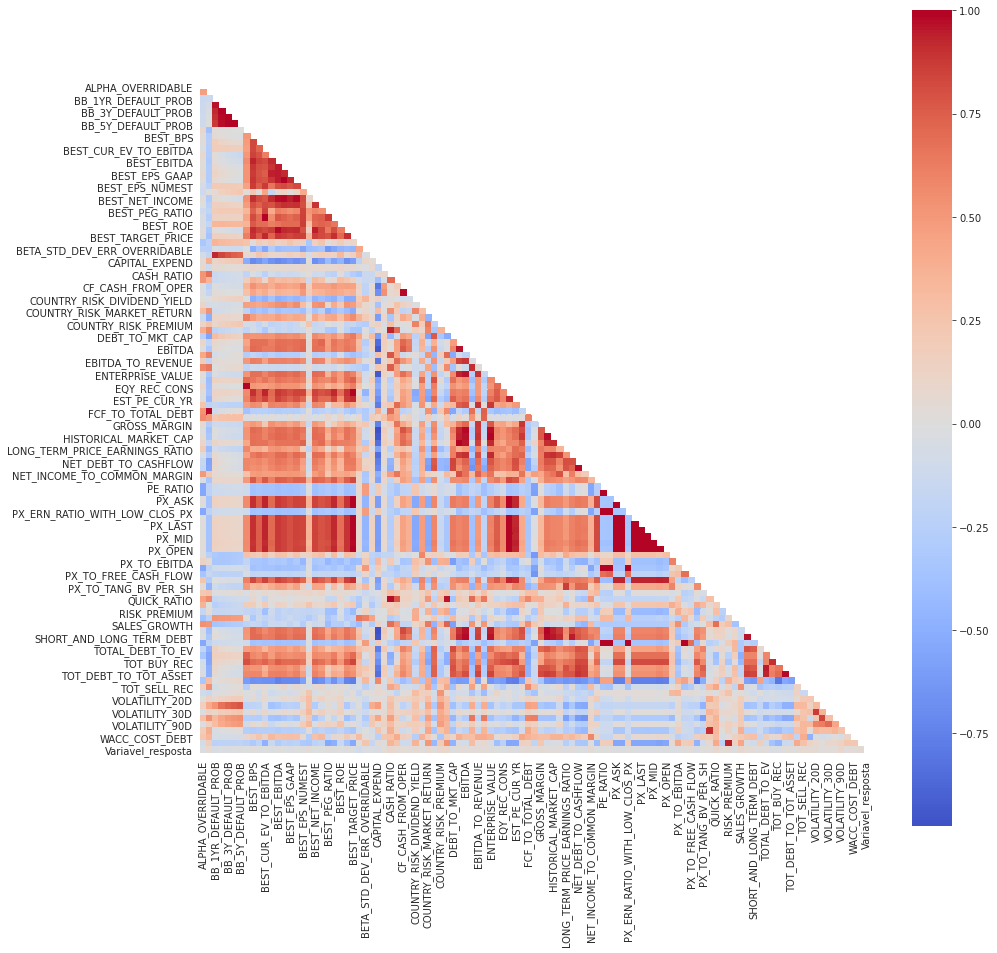

In [ ]:
correlacao = df.corr()
mask = np.zeros_like(correlacao)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    
    f, ax = plt.subplots(figsize=(15, 15))
    sns.heatmap(correlacao,center=0,cmap="coolwarm",mask=mask,square=True )

*Ao plotar o gráfico do preço médio de fechamento da ação, foi possível observar que existiam valores nulos. E sabemos que isso foi algum erro no dataset, então realizei um filtro para remover os registros onde apresentavam esse comportamento inadequado.*

In [ ]:
df = df[df["PX_MID"] != 0]

In [ ]:
figura = px.line(title="Histórico do preço das ações")
figura.add_scatter(x=df.date, y = df.PX_MID )
figura.update_xaxes(showticklabels=False)

*Calculei a porcentagem sobre a "Variavel_resposta", e apresentou:*

*66,84% sobre a classe negativa.*

*33,16% sobre a classe positiva.*

*Portanto, estamos trabalhando com um dataset desbalanceado. Esse problema será solucionado na criação dos modelos.*

Porcentagem sobre a classe negativa:  66.84
Porcentagem sobre a classe positiva:  33.16


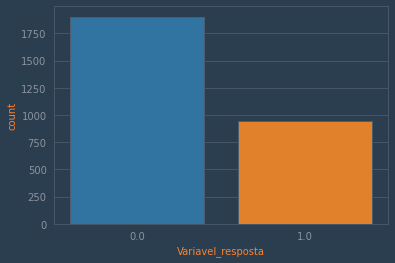

In [ ]:
import plotly.graph_objects as go
desbalanceamento = df['Variavel_resposta'].value_counts()
porcentagem_negativos = desbalanceamento[0]*100/len(df)
porcentagem_positivos = desbalanceamento[1]*100/len(df)

print("Porcentagem sobre a classe negativa: ",round(porcentagem_negativos,2))
print("Porcentagem sobre a classe positiva: ",round(porcentagem_positivos,2))

sns.countplot(data=df,x = 'Variavel_resposta')


# 2 - Ajustando os dados para os modelos de Machine Learning

*Muitos algorimos esperam receber os dados em um formato específico. Portanto, é necessário entregar os dados com uma estrutura que seja adequada ao algoritmo que será utilizado.*

## 2.1 - Escala

*A escala é uma das primeiras tarefas dentro do pré-processamento, que consiste em deixar os dados na mesma escala. Muitos algoritmos de machine learning vão se beneficiar disso e produzir resultados melhores.*

*Na etapa abaixo é chamado de normalização e significa colocar os dados em uma escala com range entre 0 e 1. Isso é útil para otimização, sendo usado nos algoritmos de Machine Learning, como gradient descent.*

In [ ]:
#Normalização sobre as escalas de valores
df_X = df.drop(columns=["Variavel_resposta","date","ticker"])
df_Y = df["Variavel_resposta"]

X = df_X.values
Y = df_Y.values

scaler = MinMaxScaler(feature_range=(0,1))
rescaledx = scaler.fit_transform(X)

# 3 - Feacture Selection

*Como o dataset apresenta 109 colunas, fica inviável computacionalmente e diversas variáveis podem afetar negativamente o modelo.*

*Os atributos presentes no dataset, terão grande influência na precisão e no modelo preditivo.*


*   **Atributos irrelevantes terão impacto negativo na performance**
*   **Atributos colineares podem afetar na acurácia do modelo**

*Nesta etapa é onde selecionamos os atributos que serão melhores candidatos a variáveis preditoras. Ajudando a reduzir o overfitting, aumentando a acurácia do modelo e reduzindo o tempo de treinamnto.*


*   **OBS: Foi criado um dataframe para registrar os resultados obtidos em cada seleção de variáveis**


# 3.1 - Seleção Univariada (CHI2)

*Testes estatísticos podem ser usados para selecionar os atributos que possuem forte relacionamento com a variável que queremos prever. Foi utilizado a função SelectKBest() que pode ser utilizada em diversos testes estatísticos, para selecionar os atributos.*

*Foi utilizado o tese do Qui-Quadrado*

*O teste de independência Qui-Quadrado é usado para descobrir se existe uma associação entre a variável de linha e coluna variável em uma tabela de contingência construído à partir dos dados.*


In [ ]:
#Extraçao de variáveis
testagem = SelectKBest(score_func=chi2,k=20)
fit = testagem.fit(rescaledx,Y)

#Sumarização do score
score = fit.scores_
colunas = df_X.columns

new_df = pd.DataFrame()
new_df["Colunas"] = colunas
new_df["Var_chi2"] = score

# 3.2 - Eliminação Recursiva de Atributos (RFE)

*Esta é outra técnica para seleção de atributos, que recursivamente remove os atributos e constroí o modelo com os atributos remanescentes. Esta técnica utiliza a acurácia do modelo para identificar os atributos que mais contribuem para prever a variável alvo.*

In [ ]:
#Criando o modelo
modelo = LogisticRegression(max_iter=1000)

#Recursive Feature Elimination (RFE)
rfe = RFE(modelo, n_features_to_select=1)
fit = rfe.fit(rescaledx,Y)

#Resultados
new_df["Var_rfe"] = fit.ranking_

# 3.3 - Método Ensemble para seleção de variáveis (ENSEMBLE)

*Bagged Decision Trees, como o algoritmo Random Forest, podem ser usados para estimar a importância de cada atributo. Esse método retorna um score para cada atributo, quanto maior, maior a importância de cada atributo*

In [ ]:
#Criando o modelo
modelo = ExtraTreesClassifier()
modelo.fit(rescaledx,Y)

new_df["Var_enseable"] = modelo.feature_importances_

In [ ]:
dfChi2 = new_df.sort_values(['Var_chi2'], ascending=False).head(20)
dfChi2 = dfChi2[["Colunas",'Var_chi2']]
print(dfChi2)

                            Colunas  Var_chi2
25             BETA_ADJ_OVERRIDABLE  3.965011
1                  ASSET_CVRG_RATIO  3.454844
52                FCF_TO_TOTAL_DEBT  3.343885
96                     TOT_SELL_REC  2.704794
38             COUNTRY_RISK_PREMIUM  2.521431
102                  VOLATILITY_90D  2.370770
86                     SALES_GROWTH  1.807307
36       COUNTRY_RISK_MARKET_RETURN  1.651537
88         SHORT_AND_LONG_TERM_DEBT  1.185000
30                       CASH_RATIO  1.157094
32                CF_CASH_FROM_OPER  1.042606
82                      QUICK_RATIO  1.032214
27   BLOOMBERG_ISSUER_DEFAULT_SCORE  1.021876
39                        CUR_RATIO  0.960266
78             PX_TO_FREE_CASH_FLOW  0.958335
41                  EARN_FOR_COMMON  0.897443
11                        BEST_EBIT  0.890261
14                    BEST_EPS_GAAP  0.867998
87                   SALES_REV_TURN  0.849642
55                     GROSS_PROFIT  0.788141


In [ ]:
dfRfe = new_df.sort_values(["Var_rfe"], ascending=True).head(20)
dfRfe = dfRfe[["Colunas","Var_rfe"]]
print(dfRfe)

                          Colunas  Var_rfe
86                   SALES_GROWTH        1
0               ALPHA_OVERRIDABLE        2
76                   PX_TO_EBITDA        3
25           BETA_ADJ_OVERRIDABLE        4
34    COUNTRY_RISK_DIVIDEND_YIELD        5
20                 BEST_PEG_RATIO        6
26   BETA_STD_DEV_ERR_OVERRIDABLE        7
104                WACC_COST_DEBT        8
81                      PX_VOLUME        9
36     COUNTRY_RISK_MARKET_RETURN       10
43        EBITDA_TO_INTEREST_EXPN       11
35       COUNTRY_RISK_GROWTH_RATE       12
12                    BEST_EBITDA       13
79              PX_TO_SALES_RATIO       14
83            REL_SHR_PX_MOMENTUM       15
62    NET_INCOME_TO_COMMON_MARGIN       16
56          HISTORICAL_MARKET_CAP       17
16                BEST_EPS_NUMEST       18
54                   GROSS_MARGIN       19
21             BEST_PE_RATIO_GAAP       20


In [ ]:
dfEnseable = new_df.sort_values(["Var_enseable"], ascending=False).head(20)
dfEnseable = dfEnseable[["Colunas","Var_enseable"]]
print(dfEnseable)

                            Colunas  Var_enseable
102                  VOLATILITY_90D      0.023696
98                   VOLATILITY_20D      0.021538
76                     PX_TO_EBITDA      0.021468
79                PX_TO_SALES_RATIO      0.021380
75                  PX_TO_CASH_FLOW      0.020172
100                  VOLATILITY_30D      0.020166
83              REL_SHR_PX_MOMENTUM      0.020165
99                  VOLATILITY_260D      0.019294
80             PX_TO_TANG_BV_PER_SH      0.018562
58   LONG_TERM_PRICE_EARNINGS_RATIO      0.018536
0                 ALPHA_OVERRIDABLE      0.018258
49              EQY_WEIGHTED_AVG_PX      0.017803
66                           PX_ASK      0.017782
37        COUNTRY_RISK_PAYOUT_RATIO      0.017671
72                           PX_MID      0.017574
5                BB_4Y_DEFAULT_PROB      0.017543
97                  VAR_SWAP_12M_LV      0.017324
2               BB_1YR_DEFAULT_PROB      0.017226
4                BB_3Y_DEFAULT_PROB      0.017146


In [ ]:
# Lista com as variáveis com maior importancia utilizando Select Feacture

col_var_chi2 = list(dfChi2["Colunas"])
col_var_rfe = list(dfRfe["Colunas"])
col_var_enseable = list(dfEnseable["Colunas"])

# 4 - Divisão dos dados

*Foi utilizado a função train_test_split() para dividir os dados de treino e de teste. Foi realizado um split de 80% para dados de treino e 20% para dados de teste.*

*Por fim utilizamos o Cross Validation sobre os dados de treino em cada modelo.*

*Cross validation é uma técnica que pode ser utilizada para avaliar a performance de um modelo com menos variância que a técnica de dividir os dados de treino/teste.*

<h1 style="text-align:center">
<img src="https://miro.medium.com/max/500/1*0_jdEVi6l1Nj-DKK8wJTTQ.png" >

*Com está técnica dividmos os dados em partes normalmente chamadas em k-folds. Ele executa cada fold por vez até k-1 fold, por fim, podemos sumarizar a performance de cada fold usando a média e o desvio padrão e outras métricas*

# 5 - Avaliando a Performance

**As métricas que são escolhidas para avaliar a performance do modelo vão influenciar a forma como a performance é medida e comparada com modelos criados com outros algoritmos.**

# 5.1 - Curva ROC

*A curva ROC permite analisar a métrica AUC (Area Unde the Curve).*

<h1 style="text-align:center">
<img src="https://miro.medium.com/max/2400/1*RqK5DjVxcj4qZsCdN4FOSQ.png">

*A curva ROC mostra o quão bom o modelo criado pode distinguir entre duas coisas (já que é utilizado para classificação). Essas duas coisas podem ser 0 ou 1, ou positivo e negativo. Os melhores modelos conseguem distinguir com precisão o binômio.*

*O valor do AUC varia de 0,0 até 1,0 e o limiar entre a classe é 0,5. Ou seja, acima desse limite, o algoritmo classifica em uma classe e abaixo na outra classe. Quanto maior o AUC, melhor.*

# 5.2 - Acurácia

*Esta é a métrica mais simples. É basicamente o número de acertos (positivos) divido pelo número total de exemplos. Ela deve ser usada em datasets com a mesma proporção de exemplos para cada classe, e quando as penalidades de acerto e erro para cada classe forem as mesmas.*

*Em problemas com classes desproporcionais, ela causa uma falsa impressão de bom desempenho. Por exemplo, num dataset em que 80% dos exemplos pertençam a uma classe, só de classificar todos os exemplos naquela classe já se atinge uma precisão de 80%, mesmo que todos os exemplos da outra classe estejam classificados incorretamente.*

#5.3 - Precisão

*A precisão pode ser usada em uma situação em que os Falsos Positivos são considerados mais prejudiciais que os Falsos Negativos. Neste trabalho ao classificar uma ação como um bom investimento, é necessário que o modelo esteja correto, mesmo que acabe classificando bons investimentos como maus investimentos (situação de Falso Negativo) no processo.*

*Ou seja, o modelo deve ser preciso em suas classificações, pois a partir do momento que consideramos um investimento bom quando na verdade ele não é, uma grande perda de dinheiro pode acontecer.*

# 5.4 - Recall

*O recall pode ser usada em uma situação em que os Falsos Negativos são considerados mais prejudiciais que os Falsos Positivos.*

*Por exemplo, o modelo deve de qualquer maneira encontrar todos os pacientes doentes, mesmo que classifique alguns saudáveis como doentes (situação de Falso Positivo) no processo. Ou seja, o modelo deve ter alto recall, pois classificar pacientes doentes como saudáveis pode ser uma tragédia.*




# 6 - Modelos de Machine Learning

*Foi criado um novo dataframe, para salvar todas as métricas de todos os modelos criados neste projeto.*

In [ ]:
#DataFrame para verificaçao de todos os modelos

df_modelos = pd.DataFrame(columns=["Modelo","Categoria","Tempo (s)","Train AUC ROC","Train ACURÁCIA","Train PRECISÃO","Train RECALL",
                                             "Test AUC ROC","Test ACURÁCIA","Test PRECISÃO","Test RECALL"])

# 6.1 - Lostic Regression

*A Regressão Logística é uma análise que nos permite estimar a probabilidade associada à ocorrência de determinado evento em face de um conjunto de variáveis explanatórias.*

**As vantagens desse tipo de regressão incluem:**
- Facilidade para lidar com variáveis independentes categóricas;
- Fornece resultados em termos de probabilidade;
- Facilidade de classificação de indivíduos em categorias;
- Requer pequeno número de suposições;
- Possui alto grau de confiabilidade.

<h1 style="text-align:center">
<img src="https://static.javatpoint.com/tutorial/machine-learning/images/logistic-regression-in-machine-learning.png" style="width:900px;height:400px;">

# 6.2 - Linear Discriminant Analysis

*O objetivo da análise discriminante é desenvolver funções discriminantes que nada mais são do que a combinação linear de variáveis ​​independentes que discriminarão entre as categorias da variável dependente de maneira perfeita.*

*Deseja-se que as amostras tenham a maior distância entre classes e a menor distância dentro da classe, ou seja, maximização da separação entre duas ou mais classes*

#6.3 - Naive Bayes

*O algoritmo Naïve Bayes é um algoritmo de aprendizagem supervisionada, baseado no teorema de Bayes e utilizado para resolver problemas de classificação.*

*O Naïve Bayes Classifier é um dos algoritmos de classificação mais simples e eficazes que ajuda na construção de modelos de aprendizado de máquina rápidos que podem fazer previsões rápidas.*

*É um classificador probabilístico, o que significa que prevê com base na probabilidade de um objeto .*

# 6.4 - KNeighbors Classifier

*Em estatística , o algoritmo k-nearest neighbors ( k-NN ) é um método não paramétrico proposto por Thomas Cover usado para classificação e regressão .*

*k-NN é um tipo de aprendizagem baseada em instância , ou aprendizagem preguiçosa , onde a função é aproximada apenas localmente e todos os cálculos são adiados até a avaliação da função. Como esse algoritmo depende da distância para classificação, normalizar os dados de treinamento pode melhorar drasticamente sua precisão.*

*Tanto para classificação quanto para regressão, uma técnica útil pode ser atribuir pesos às contribuições dos vizinhos, de modo que os vizinhos mais próximos contribuam mais para a média do que os mais distantes.*

<h1 style="text-align:center">
<img src="https://static.javatpoint.com/tutorial/machine-learning/images/k-nearest-neighbor-algorithm-for-machine-learning2.png" style="width:900px;height:400px;">


#6.5 - Decision Tree Classifier

*Uma árvore de decisão toma como entrada um objeto ou situação descrito por um conjunto de atributos e retorna uma decisão - o valor de saída previsto, de acordo com a entrada*

*A árvore de classificação é o resultado de se fazer uma sequência ordenada de perguntas, e as perguntas feitas a cada passo na sequência dependem das respostas às perguntas anteriores. A sequência termina em uma previsão da classe.*

#6.6 - Suport Vector Machine

*As Máquinas de Vetor Suporte destacam-se pela forte fundamentação teórica existente, possuindo como base a teoria da aprendizagem estatística, sendo esta característica um diferencial sobre outras técnicas como redes neurais, que não possui um modelo teórico.*

*A capacidade em trabalhar com padrões de alta dimensionalidade é outra caracteréstica interessante desta técnica, sendo ideal para aplicação em problemas de visão computacional, como reconhecimento de padrões e filtragem*

In [ ]:
#Seleceçao de modelos

def selecao_modelos(df,colunas,previsao,df_modelo,variavel):
    
    df_X = df[colunas]
    df_Y = df[previsao]
    
    #Realizando o split sobre os dados
    variaveis = variavel
    seed = 7   
    X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size = 0.2,random_state=seed)  
    
   
    #Separando o array em componentes X e Y
    X = X_train
    Y = y_train
    
    #Normalização
    scaler = MinMaxScaler(feature_range=(0,1))
    rescaledx = scaler.fit_transform(X)
    
    #Definindo os valores para o número de folds
    num_folds = 5
    num_instances = len(rescaledx)

    #Preparando o modelo
    modelos = []
    modelos.append(("LR",LogisticRegression(max_iter=400)))
    modelos.append(("LDA",LinearDiscriminantAnalysis()))
    modelos.append(("NB",GaussianNB()))
    modelos.append(("KNN",KNeighborsClassifier()))
    modelos.append(("CART",DecisionTreeClassifier()))
    modelos.append(("SVM",SVC()))

    for nome,modelo in modelos:
        
        kfold = StratifiedKFold(n_splits = num_folds,random_state=seed,shuffle = True)
        
        inicio = time.time()
        cv_roc = cross_val_score(modelo,rescaledx,Y,cv = kfold,scoring="roc_auc")
        cv_acc = cross_val_score(modelo,rescaledx,Y,cv = kfold,scoring="accuracy")
        cv_prec = cross_val_score(modelo,rescaledx,Y,cv = kfold,scoring="precision")
        cv_recall = cross_val_score(modelo,rescaledx,Y,cv = kfold,scoring="recall")
        
        
        modelo_test = modelo.fit(rescaledx,Y)
        
        #Normalização
        
        scaler = MinMaxScaler(feature_range=(0,1))
        rescaledx_test = scaler.fit_transform(X_test)
        
        y_pred = modelo_test.predict(rescaledx_test)

        cv_acc_test = accuracy_score(y_test,y_pred)
        cv_roc_test = roc_auc_score(y_test,y_pred)
        cv_prec_test = precision_score(y_test,y_pred)
        cv_recall_test = recall_score(y_test,y_pred)
        
        fim = time.time()

        tempo = fim - inicio
        #print(msg)
        df_modelo.loc[len(df_modelo)+1] = [nome,variaveis,tempo,
                                           round(cv_roc.mean()*100,2),round(cv_acc.mean()*100,2),
                                           round(cv_prec.mean()*100,2),round(cv_recall.mean()*100,2),
                                           round(cv_roc_test.mean()*100,2),round(cv_acc_test.mean()*100,2),
                                           round(cv_prec_test.mean()*100,2),round(cv_recall_test.mean()*100,2)]
       
              
        
selecao_modelos(df,col_var_chi2,"Variavel_resposta",df_modelos,variavel="CHI2")
selecao_modelos(df,col_var_rfe,"Variavel_resposta",df_modelos,variavel="RFE")
selecao_modelos(df,col_var_enseable ,"Variavel_resposta",df_modelos,variavel="ENSEMBLE")

In [ ]:
#ExtraTreesClassifier

def selecao_modelos(df,colunas,previsao,df_modelo,variavel):
    df_X = df[colunas]
    df_Y = df[previsao]
    
    #Realizando o split sobre os dados
    variaveis = variavel
    seed = 7   
    X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size = 0.20,random_state=seed)  
       
    #Separando o array em componentes X e Y
    X = X_train
    Y = y_train
    
    #Normalização
    scaler = MinMaxScaler(feature_range=(0,1))
    rescaledx = scaler.fit_transform(X)
    
    #Definindo os valores para o número de folds
    num_folds = 5
    num_instances = len(rescaledx)
    
    #Preparando o modelo
    modelo = ExtraTreesClassifier(random_state=seed)

    #Criando o modelo ensemble
    inicio =time.time()
    kfold = StratifiedKFold(n_splits = num_folds,random_state=seed,shuffle = True)
    
    cv_roc = cross_val_score(modelo,rescaledx,Y,cv = kfold,scoring="roc_auc")
    cv_acc = cross_val_score(modelo,rescaledx,Y,cv = kfold,scoring="accuracy")
    cv_prec = cross_val_score(modelo,rescaledx,Y,cv = kfold,scoring="precision")
    cv_recall = cross_val_score(modelo,rescaledx,Y,cv = kfold,scoring="recall")    
    
    modelo_test = modelo.fit(rescaledx,Y)
    #Normalização
        
    scaler = MinMaxScaler(feature_range=(0,1))
    rescaledx_test = scaler.fit_transform(X_test)
        
    y_pred = modelo_test.predict(rescaledx_test)

    cv_acc_test = accuracy_score(y_test,y_pred)
    cv_prec_test = precision_score(y_test,y_pred)
    cv_recall_test = recall_score(y_test,y_pred)
    cv_roc_test = roc_auc_score(y_test,y_pred)

    nome = "ExtraTreeClassifier"
    fim = time.time()
    tempo = fim - inicio

    df_modelo.loc[len(df_modelo)+1] = [nome,variaveis,tempo,
                                           round(cv_roc.mean()*100,2),round(cv_acc.mean()*100,2),
                                           round(cv_prec.mean()*100,2),round(cv_recall.mean()*100,2),
                                           round(cv_roc_test.mean()*100,2),round(cv_acc_test.mean()*100,2),
                                           round(cv_prec_test.mean()*100,2),round(cv_recall_test.mean()*100,2)]
       
              
selecao_modelos(df,col_var_chi2,"Variavel_resposta",df_modelos,variavel="CHI2")
selecao_modelos(df,col_var_rfe,"Variavel_resposta",df_modelos,variavel="RFE")
selecao_modelos(df,col_var_enseable ,"Variavel_resposta",df_modelos,variavel="ENSEMBLE")

#7 - Otimização de Performance com Métodos Ensemble

*Métodos Ensemble permitem aumentar consideralvemente o nível de precisão nas suas previsões. Foi criado métodos Ensemble mais poderosos:*

*Bagging: Para consutrução de múltiplos modelos a partir de diferentes subset no dataset de treino*

*Boosting: Para construção de múltiplos modelos, onde cada modelo aprende a corrigir os erros gerados pelo modelo anterior.*


#7.1 - Bagged Decision Trees 

*Este método funciona bem quando existe alta variância nos dados*



In [ ]:
# Bagged Decision Trees

def selecao_modelos(df,colunas,previsao,df_modelo,variavel):
    df_X = df[colunas]
    df_Y = df[previsao]
    
    #Realizando o split sobre os dados
    variaveis = variavel
    seed = 7   
    X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size = 0.20,random_state=seed)  
    
    #Separando o array em componentes X e Y
    X = X_train
    Y = y_train
    
    #Normalização
    scaler = MinMaxScaler(feature_range=(0,1))
    rescaledx = scaler.fit_transform(X)

    #Definindo os valores para o número de folds
    num_folds = 5
    num_instances = len(rescaledx)
    
    #Preparando o modelo
    modelos = []
    modelos.append(("BDT LR",LogisticRegression(max_iter=400)))
    modelos.append(("BDT LDA",LinearDiscriminantAnalysis()))
    modelos.append(("BDT NB",GaussianNB()))
    modelos.append(("BDT KNN",KNeighborsClassifier()))
    modelos.append(("BDT CART",DecisionTreeClassifier()))
    modelos.append(("BDT SVM",SVC()))
    
    for nome,modelo in modelos:
        kfold = StratifiedKFold(n_splits = num_folds,random_state=seed,shuffle = True)
        
        inicio =time.time()
        modelo_bagging = BaggingClassifier(base_estimator=modelo,
                                          n_estimators = 100,random_state = seed)

        cv_roc = cross_val_score(modelo_bagging,rescaledx,Y,cv = kfold,scoring="roc_auc")
        cv_acc = cross_val_score(modelo_bagging,rescaledx,Y,cv = kfold,scoring="accuracy")
        cv_prec = cross_val_score(modelo_bagging,rescaledx,Y,cv = kfold,scoring="precision")
        cv_recall = cross_val_score(modelo_bagging,rescaledx,Y,cv = kfold,scoring="recall")       
        
        modelo_test = modelo_bagging.fit(rescaledx,Y)
        
        #Normalização
        
        scaler = MinMaxScaler(feature_range=(0,1))
        rescaledx_test = scaler.fit_transform(X_test)
        y_pred = modelo_test.predict(rescaledx_test)


        cv_acc_test = accuracy_score(y_test,y_pred)
        cv_roc_test = roc_auc_score(y_test,y_pred)
        cv_prec_test = precision_score(y_test,y_pred)
        cv_recall_test = recall_score(y_test,y_pred)

        fim = time.time()
        
        tempo = fim - inicio
        df_modelo.loc[len(df_modelo)+1] = [nome,variaveis,tempo,
                                           round(cv_roc.mean()*100,2),round(cv_acc.mean()*100,2),
                                           round(cv_prec.mean()*100,2),round(cv_recall.mean()*100,2),
                                           round(cv_roc_test.mean()*100,2),round(cv_acc_test.mean()*100,2),
                                           round(cv_prec_test.mean()*100,2),round(cv_recall_test.mean()*100,2)]
       
              
        
selecao_modelos(df,col_var_chi2,"Variavel_resposta",df_modelos,variavel="CHI2")
selecao_modelos(df,col_var_rfe,"Variavel_resposta",df_modelos,variavel="RFE")
selecao_modelos(df,col_var_enseable ,"Variavel_resposta",df_modelos,variavel="ENSEMBLE")

#7.2 Random Forest

*Random Forest é uma extensão do Bagging Decision Tree. Amostras do dataset de treino são usadas com reposição, mas as árvoes são criadas de uma forma que reduz a correlação entre classificadores individuais.*

In [ ]:
# Random Forest

def selecao_modelos(df,colunas,previsao,df_modelo,variavel):
    df_X = df[colunas]
    df_Y = df[previsao]
    
    #Realizando o split sobre os dados
    variaveis = variavel
    seed = 7   
    X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size = 0.20,random_state=seed)     
   
    #Separando o array em componentes X e Y
    X = X_train
    Y = y_train
    
    #Normalização
    scaler = MinMaxScaler(feature_range=(0,1))
    rescaledx = scaler.fit_transform(X)
    
    #Definindo os valores para o número de folds
    num_folds = 5
    num_instances = len(rescaledx)
    nome = "Random Forest"
    
    kfold = StratifiedKFold(n_splits = num_folds,random_state=seed,shuffle = True)
    inicio =time.time()
        
    modelo= RandomForestClassifier(n_estimators = 100,max_features = 3)
        
    cv_roc = cross_val_score(modelo,rescaledx,Y,cv = kfold,scoring="roc_auc")
    cv_acc = cross_val_score(modelo,rescaledx,Y,cv = kfold,scoring="accuracy")
    cv_prec = cross_val_score(modelo,rescaledx,Y,cv = kfold,scoring="precision")
    cv_recall = cross_val_score(modelo,rescaledx,Y,cv = kfold,scoring="recall")

    modelo_test = modelo.fit(rescaledx,Y)
    
    #Normalização
        
    scaler = MinMaxScaler(feature_range=(0,1))
    rescaledx_test = scaler.fit_transform(X_test)        
    y_pred = modelo_test.predict(rescaledx_test)

    cv_acc_test = accuracy_score(y_test,y_pred)
    cv_roc_test = roc_auc_score(y_test,y_pred)
    cv_prec_test = precision_score(y_test,y_pred)
    cv_recall_test = recall_score(y_test,y_pred)

    fim = time.time()   
    tempo = fim - inicio
    df_modelo.loc[len(df_modelo)+1] = [nome,variaveis,tempo,
                                           round(cv_roc.mean()*100,2),round(cv_acc.mean()*100,2),
                                           round(cv_prec.mean()*100,2),round(cv_recall.mean()*100,2),
                                           round(cv_roc_test.mean()*100,2),round(cv_acc_test.mean()*100,2),
                                           round(cv_prec_test.mean()*100,2),round(cv_recall_test.mean()*100,2)]
       
selecao_modelos(df,col_var_chi2,"Variavel_resposta",df_modelos,variavel="CHI2")
selecao_modelos(df,col_var_rfe,"Variavel_resposta",df_modelos,variavel="RFE")
selecao_modelos(df,col_var_enseable ,"Variavel_resposta",df_modelos,variavel="ENSEMBLE")

#7.3 - AdaBoost

*Algoritmo baseado em Boosting Ensemble criam uma sequência de modelos que tentam corrigir os erros dos modelos anteriores dentro da sequência. Uma vez criados, os modelos fazem previsões que podem receber um peso de acordo com sua acurácia e os resultados são combinados para criar uma previsão única final.*

*O AdaBoost atribui pesos às instâncias no dataset, definindo quão fácil ou difícil elas são para o precesso de classificação, permitindo que o algoritmo tenham mais ou menos atenção às instâncias durante o processo de construção dos modelos.*

In [ ]:
# AdaBoost

def selecao_modelos(df,colunas,previsao,df_modelo,variavel):
    df_X = df[colunas]
    df_Y = df[previsao]
    
    #Realizando o split sobre os dados
    variaveis = variavel
    seed = 7   
    X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size = 0.20,random_state=seed)  
    
    #Separando o array em componentes X e Y
    X = X_train
    Y = y_train
    
    #Normalização
    scaler = MinMaxScaler(feature_range=(0,1))
    rescaledx = scaler.fit_transform(X)
    
    #Definindo os valores para o número de folds
    num_folds = 5
    num_instances = len(rescaledx)
    nome = "AdaBoost"

    kfold = StratifiedKFold(n_splits = num_folds,random_state=seed,shuffle = True)
    inicio =time.time()
    modelo= AdaBoostClassifier(n_estimators = 30,random_state=seed)
    
    cv_roc = cross_val_score(modelo,rescaledx,Y,cv = kfold,scoring="roc_auc")
    cv_acc = cross_val_score(modelo,rescaledx,Y,cv = kfold,scoring="accuracy")
    cv_prec = cross_val_score(modelo,rescaledx,Y,cv = kfold,scoring="precision")
    cv_recall = cross_val_score(modelo,rescaledx,Y,cv = kfold,scoring="recall")

    modelo_test = modelo.fit(rescaledx,Y)
    #Normalização
        
    scaler = MinMaxScaler(feature_range=(0,1))
    rescaledx_test = scaler.fit_transform(X_test)        
    y_pred = modelo_test.predict(rescaledx_test)

    cv_acc_test = accuracy_score(y_test,y_pred)
    cv_roc_test = roc_auc_score(y_test,y_pred)
    cv_prec_test = precision_score(y_test,y_pred)
    cv_recall_test = recall_score(y_test,y_pred)
        
    fim = time.time()
    tempo = fim - inicio
    df_modelo.loc[len(df_modelo)+1] = [nome,variaveis,tempo,
                                           round(cv_roc.mean()*100,2),round(cv_acc.mean()*100,2),
                                           round(cv_prec.mean()*100,2),round(cv_recall.mean()*100,2),
                                           round(cv_roc_test.mean()*100,2),round(cv_acc_test.mean()*100,2),
                                           round(cv_prec_test.mean()*100,2),round(cv_recall_test.mean()*100,2)]
       
selecao_modelos(df,col_var_chi2,"Variavel_resposta",df_modelos,variavel="CHI2")
selecao_modelos(df,col_var_rfe,"Variavel_resposta",df_modelos,variavel="RFE")
selecao_modelos(df,col_var_enseable ,"Variavel_resposta",df_modelos,variavel="ENSEMBLE")

#7.4 - Gradiente Boosting

*Também chamado de Stochastic Gradient Boosting, é um dos métodos Ensemble mais sofisticados*

In [ ]:
# Gradiente Boosting


def selecao_modelos(df,colunas,previsao,df_modelo,variavel):
    df_X = df[colunas]
    df_Y = df[previsao]
    
    #Realizando o split sobre os dados

    variaveis = variavel
    seed = 7   
    X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size = 0.20,random_state=seed)  
    
    #Separando o array em componentes X e Y
    X = X_train
    Y = y_train
    
    #Normalização
    scaler = MinMaxScaler(feature_range=(0,1))
    rescaledx = scaler.fit_transform(X)
    
    #Definindo os valores para o número de folds
    num_folds = 5
    num_instances = len(rescaledx)
    nome = "Gradiente Boosting"

    kfold = StratifiedKFold(n_splits = num_folds,random_state=seed,shuffle = True)
    inicio =time.time()
    modelo= GradientBoostingClassifier(n_estimators = 30,random_state=seed)

    cv_roc = cross_val_score(modelo,rescaledx,Y,cv = kfold,scoring="roc_auc")
    cv_acc = cross_val_score(modelo,rescaledx,Y,cv = kfold,scoring="accuracy")
    cv_prec = cross_val_score(modelo,rescaledx,Y,cv = kfold,scoring="precision")
    cv_recall = cross_val_score(modelo,rescaledx,Y,cv = kfold,scoring="recall")

    modelo_test = modelo.fit(rescaledx,Y)
    
    #Normalização
        
    scaler = MinMaxScaler(feature_range=(0,1))
    rescaledx_test = scaler.fit_transform(X_test)        
    y_pred = modelo_test.predict(rescaledx_test)

    cv_acc_test = accuracy_score(y_test,y_pred)
    cv_roc_test = roc_auc_score(y_test,y_pred)
    cv_prec_test = precision_score(y_test,y_pred)
    cv_recall_test = recall_score(y_test,y_pred)

    fim = time.time()
    tempo = fim - inicio
    df_modelo.loc[len(df_modelo)+1] = [nome,variaveis,tempo,
                                           round(cv_roc.mean()*100,2),round(cv_acc.mean()*100,2),
                                           round(cv_prec.mean()*100,2),round(cv_recall.mean()*100,2),
                                           round(cv_roc_test.mean()*100,2),round(cv_acc_test.mean()*100,2),
                                           round(cv_prec_test.mean()*100,2),round(cv_recall_test.mean()*100,2)]

  
selecao_modelos(df,col_var_chi2,"Variavel_resposta",df_modelos,variavel="CHI2")
selecao_modelos(df,col_var_rfe,"Variavel_resposta",df_modelos,variavel="RFE")
selecao_modelos(df,col_var_enseable ,"Variavel_resposta",df_modelos,variavel="ENSEMBLE")


#7.5 - XGBoost

*O algoritmo XGBoost é uma extensão do GBM (Gradient Boosting Method) que permite trabalhar com multi threading em uma única máquina e precessamento paralelo em um cluster de vários servidores.*

*A principal vantagem do XGBoost sobre GBM é sua capacidade de gerenciar dados esparsos*

In [ ]:
#XGBoost - Extreme Gradient Boosting

def selecao_modelos(df,colunas,previsao,df_modelo,variavel):
    df_X = df[colunas]
    df_Y = df[previsao]
    
    #Realizando o split sobre os dados
    variaveis = variavel
    seed = 7   
    X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size = 0.20,random_state=seed)  
    
   
    #Separando o array em componentes X e Y
    X = X_train
    Y = y_train
    
    #Normalização
    scaler = MinMaxScaler(feature_range=(0,1))
    rescaledx = scaler.fit_transform(X)

        #Definindo os valores para o número de folds
    num_folds = 5
    num_instances = len(rescaledx)
    
    
    #Criando o modelo
    nome = "XGBoost"
    inicio =time.time()
    modelo = XGBClassifier()
    kfold = StratifiedKFold(n_splits = num_folds,random_state=seed,shuffle = True)

    cv_roc = cross_val_score(modelo,rescaledx,Y,cv = kfold,scoring="roc_auc")
    cv_acc = cross_val_score(modelo,rescaledx,Y,cv = kfold,scoring="accuracy")
    cv_prec = cross_val_score(modelo,rescaledx,Y,cv = kfold,scoring="precision")
    cv_recall = cross_val_score(modelo,rescaledx,Y,cv = kfold,scoring="recall")

        
    
    modelo_test = modelo.fit(rescaledx,Y)
    #Normalização
        
    scaler = MinMaxScaler(feature_range=(0,1))
    rescaledx_test = scaler.fit_transform(X_test)
        
    y_pred = modelo_test.predict(rescaledx_test)

    cv_acc_test = accuracy_score(y_test,y_pred)
    cv_roc_test = roc_auc_score(y_test,y_pred)
    cv_prec_test = precision_score(y_test,y_pred)
    cv_recall_test = recall_score(y_test,y_pred)

    fim = time.time()
    tempo = fim - inicio

    df_modelo.loc[len(df_modelo)+1] = [nome,variaveis,tempo,
                                           round(cv_roc.mean()*100,2),round(cv_acc.mean()*100,2),
                                           round(cv_prec.mean()*100,2),round(cv_recall.mean()*100,2),
                                           round(cv_roc_test.mean()*100,2),round(cv_acc_test.mean()*100,2),
                                           round(cv_prec_test.mean()*100,2),round(cv_recall_test.mean()*100,2)]

     
              
        
selecao_modelos(df,col_var_chi2,"Variavel_resposta",df_modelos,variavel="CHI2")
selecao_modelos(df,col_var_rfe,"Variavel_resposta",df_modelos,variavel="RFE")
selecao_modelos(df,col_var_enseable ,"Variavel_resposta",df_modelos,variavel="ENSEMBLE")

# Avaliação sobre os modelos

**Foi definido a tabela por ordem crescente sobre os modelos que apresentaram os maiores valores de precisão nos dados de teste.**

**A partir destes dados, foi criado um dashboard para auxiliar a conclusão do projeto.**

In [ ]:
df_modelos = df_modelos.sort_values(['Test PRECISÃO'],ascending=False).head(45)
df_modelos

,Modelo,Categoria,Tempo (s),Train AUC ROC,Train ACURÁCIA,Train PRECISÃO,Train RECALL,Test AUC ROC,Test ACURÁCIA,Test PRECISÃO,Test RECALL
19,ExtraTreeClassifier,CHI2,5.820378,90.61,85.11,79.54,73.56,80.37,84.91,88.44,65.33
26,BDT CART,CHI2,26.666282,90.47,83.58,78.32,68.86,79.12,84.04,88.03,62.81
40,Random Forest,CHI2,7.774175,90.38,83.40,78.25,71.14,78.23,83.33,87.14,61.31
21,ExtraTreeClassifier,ENSEMBLE,5.922948,94.27,89.06,85.71,80.00,81.82,85.44,85.80,69.85
42,Random Forest,ENSEMBLE,12.881219,93.35,87.13,83.23,73.56,81.19,84.91,85.09,68.84
20,ExtraTreeClassifier,RFE,5.926033,92.05,86.30,81.63,75.30,86.62,87.89,82.83,82.41
38,BDT CART,ENSEMBLE,61.497011,93.05,86.03,82.75,72.48,81.37,84.39,81.61,71.36
41,Random Forest,RFE,9.712252,91.31,85.24,81.05,70.87,81.60,84.39,80.90,72.36
33,BDT SVM,RFE,176.315452,73.15,68.82,61.75,12.35,56.71,69.12,79.49,15.58
12,SVM,RFE,3.831020,73.93,68.82,62.43,11.95,54.97,68.07,79.31,11.56


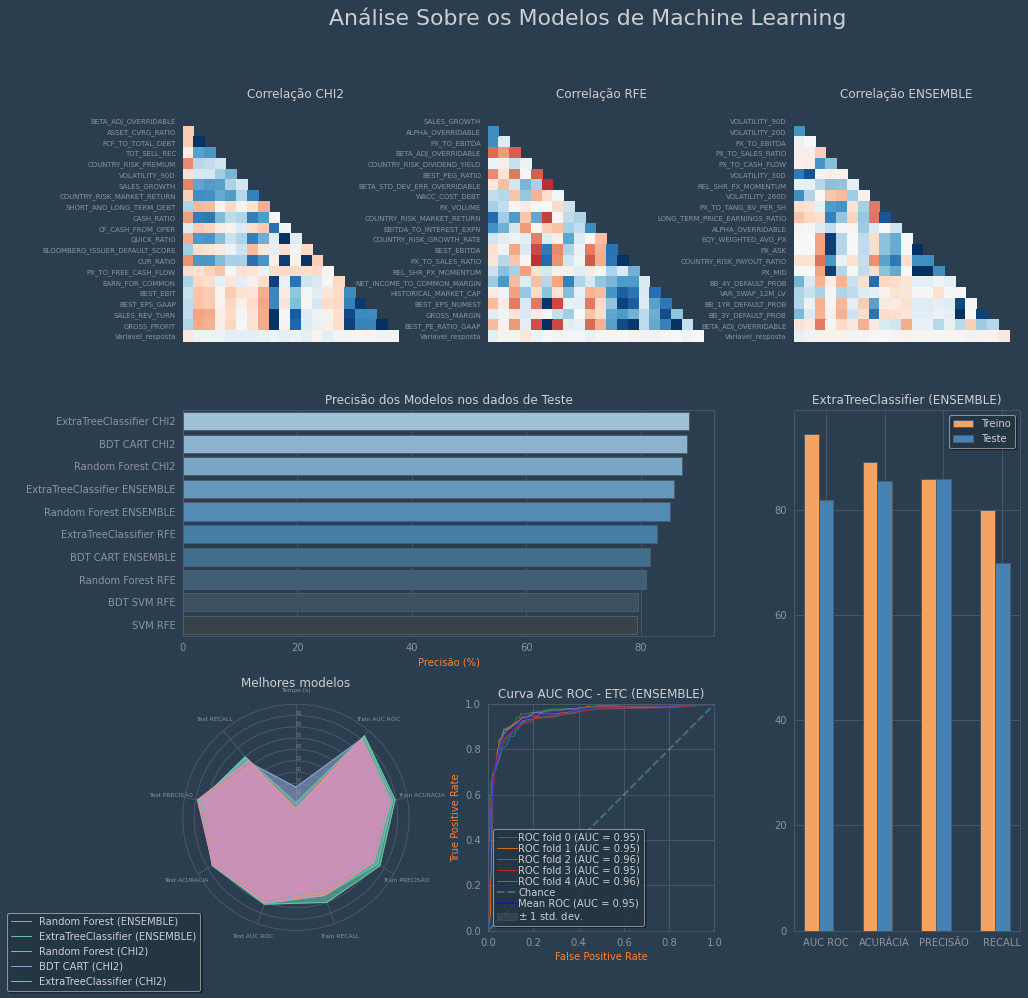

In [ ]:
plt.figure(figsize=(15, 15))
G = gridspec.GridSpec(3, 3,hspace = 0.3, wspace=0.35)
plt.suptitle("Análise Sobre os Modelos de Machine Learning",fontsize=22,)

# ======================================== PLOT 1 =======================================

axes_1 = plt.subplot(G[0,0])
train = df[col_var_chi2 + ['Variavel_resposta']]
correlacao = train.corr()
mask = np.zeros_like(correlacao)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    plt.title('Correlação CHI2', y=1.05, size=12)
    sns.heatmap(correlacao,center=0,cmap=plt.cm.RdBu,mask=mask,square=True,ax=axes_1,cbar=False,xticklabels=False)
    plt.xticks(size=8)
    plt.yticks(size=7)
    
# ======================================== PLOT 2 =======================================

axes_2 = plt.subplot(G[0,-2])
train = df[col_var_rfe + ['Variavel_resposta']]
correlacao = train.corr()
mask = np.zeros_like(correlacao)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    plt.title('Correlação RFE', y=1.05, size=12)
    sns.heatmap(correlacao,center=0,cmap=plt.cm.RdBu,mask=mask,square=True,ax=axes_2,cbar=False,xticklabels=False)
    plt.xticks(size=8)
    plt.yticks(size=7)

# ======================================== PLOT 3 =======================================

axes_3 = plt.subplot(G[0,-1])
train = df[col_var_enseable + ['Variavel_resposta']]
correlacao = train.corr()
mask = np.zeros_like(correlacao)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    plt.title('Correlação ENSEMBLE', y=1.05, size=12)
    sns.heatmap(correlacao,center=0,cmap=plt.cm.RdBu,mask=mask,square=True,ax=axes_3,cbar=False,xticklabels=False)
    plt.xticks(size=8)
    plt.yticks(size=7)

# ======================================== PLOT 4 =======================================

axes_4 = plt.subplot(G[1, :-1])
model = list(df_modelos["Modelo"].head(10)) 
variavel = list(df_modelos["Categoria"].head(10))
model_variavel = []
x = 0
while x < len(df_modelos.head(10)):
  model_variavel.append(model[x]+" "+variavel[x])
  x = x +1
sns.barplot(y= model_variavel,x= df_modelos["Test PRECISÃO"].head(10),ax=axes_4,palette="Blues_d",ci=[2.45,2,1,12.2,4,2.45,2,1,12.2,4])
plt.xlabel("Precisão (%)")
plt.title("Precisão dos Modelos nos dados de Teste")

# ======================================== PLOT 5 =======================================

axes_5 = plt.subplot(G[1:, -1])

colunas_treino = ["Train AUC ROC","Train ACURÁCIA","Train PRECISÃO","Train RECALL"]
colunas_teste = ["Test AUC ROC","Test ACURÁCIA","Test PRECISÃO","Test RECALL"]
query_modelo = df_modelos.query('Modelo == "ExtraTreeClassifier" & Categoria == "ENSEMBLE"')

dados_treino = query_modelo[colunas_treino].values[0]
dados_teste = query_modelo[colunas_teste].values[0]

# Cria eixo x para produto A e produto B com uma separação de 0.25 entre as barras
x1 =  np.arange(len(dados_treino))
x2 = [x + 0.25 for x in x1]

# Plota as barras
plt.bar(x1, dados_treino, width=0.25, label = 'Treino',color="sandybrown" )
plt.bar(x2, dados_teste, width=0.25, label = 'Teste',color="steelblue")

# coloca o nome dos meses como label do eixo x
meses = ['AUC ROC','ACURÁCIA','PRECISÃO','RECALL']
plt.xticks([x + 0.25 for x in range(len(x1))], meses)

# inseri uma legenda no gráfico
plt.legend()

plt.title("ExtraTreeClassifier (ENSEMBLE)")

# ======================================== PLOT 6 =======================================

axes_6 = plt.subplot(G[-1, 0],polar=True)
df_2 = df_modelos.drop('Categoria', axis=1)
#Numero de variaveis
categories=list(df_2)[1:]
N = len(categories)
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
color = plt.cm.get_cmap("Set2", len(df_modelos.head(10).index))
# If you want the first axis to be on top:
axes_6.set_theta_offset(pi / 2)
axes_6.set_theta_direction(-1)
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories,size=6)
# Draw ylabels
axes_6.set_rlabel_position(0)
plt.yticks([10,20,30,40,50,60,70,80,90], ["10","20","30","40","50","60","70","80","90"], color="grey", size=5)
plt.ylim(0,100)
# Ind1
values = df_modelos.iloc[4].drop(['Modelo','Categoria']).values.flatten().tolist()
values += values[:1]
axes_6.plot(angles, values, color=color(0), linewidth=1, linestyle='solid',label=str(df_modelos.iloc[4]['Modelo'])+' ('+str(df_modelos.iloc[4]['Categoria']+ ")"))
axes_6.fill(angles, values, color=color(0), alpha=0.6)
# Ind2
values = df_modelos.iloc[3].drop(['Modelo','Categoria']).values.flatten().tolist()
values += values[:1]
axes_6.plot(angles, values, color=color(1), linewidth=1, linestyle='solid',label=str(df_modelos.iloc[3]['Modelo'])+' ('+str(df_modelos.iloc[3]['Categoria']+")"))
axes_6.fill(angles, values, color=color(1), alpha=0.6)
# Ind3
values = df_modelos.iloc[2].drop(['Modelo','Categoria']).values.flatten().tolist()
values += values[:1]
axes_6.plot(angles, values, color=color(2), linewidth=1, linestyle='solid',label=str(df_modelos.iloc[2]['Modelo'])+' ('+str(df_modelos.iloc[2]['Categoria']+")"))
axes_6.fill(angles, values, color=color(2), alpha=0.6)
# Ind4
values = df_modelos.iloc[1].drop(['Modelo','Categoria']).values.flatten().tolist()
values += values[:1]
axes_6.plot(angles, values, color=color(3), linewidth=1, linestyle='solid',label=str(df_modelos.iloc[1]['Modelo'])+' ('+str(df_modelos.iloc[1]['Categoria']+")"))
axes_6.fill(angles, values, color=color(3), alpha=0.6)
# Ind5
values = df_modelos.iloc[0].drop(['Modelo','Categoria']).values.flatten().tolist()
values += values[:1]
axes_6.plot(angles, values, color=color(4), linewidth=1, linestyle='solid',label=str(df_modelos.iloc[0]['Modelo'])+' ('+str(df_modelos.iloc[0]['Categoria']+")"))
axes_6.fill(angles, values, color=color(4), alpha=0.6)
axes_6.legend(loc='best', bbox_to_anchor=(0.1, 0.1))
axes_6.set(title="Melhores modelos")

# ======================================== PLOT 7 =======================================

axes_7 = plt.subplot(G[-1, -2])
def selecao_modelos(df,colunas,previsao,variavel):
    df_X = df[colunas]
    df_Y = df[previsao]
    
    variaveis = variavel
    seed = 7   
    X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size = 0.25,random_state=seed) 
    
    
    #Separando o array em componentes X e Y
    X = df_X.values
    Y = df_Y.values

    
    #Normalização
    scaler = MinMaxScaler(feature_range=(0,1))
    rescaledx = scaler.fit_transform(X)
    
    #Definindo os valores para o número de folds
    num_folds = 5
    num_instances = len(rescaledx)   
    
    
    kfold = StratifiedKFold(n_splits = num_folds,random_state=seed,shuffle = True)
    inicio =time.time()
    modelo = ExtraTreesClassifier()
    cv_results = cross_val_score(modelo,rescaledx,Y,cv = kfold,scoring="accuracy")
    fim = time.time()
    tempo = fim - inicio
        
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    for i, (train, test) in enumerate(kfold.split(rescaledx, Y)):
        modelo.fit(rescaledx[train], Y[train])
        viz = plot_roc_curve(modelo, rescaledx[test], Y[test],
                             name='ROC fold {}'.format(i),
                             alpha=0.8, lw=1, ax=axes_7)
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

    axes_7.plot([0, 1], [0, 1], linestyle='--', lw=2, color=color(1),
                    label='Chance', alpha=.4)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    axes_7.plot(mean_fpr, mean_tpr, color='b',
            label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
            lw=2, alpha=.4)
    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    axes_7.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')
    axes_7.set(xlim=[0, 1], ylim=[0, 1],
                 title="Curva AUC ROC - ETC (ENSEMBLE)")
    axes_7.legend( loc="best",handletextpad=0.1, labelspacing=0.1)

selecao_modelos(df,col_var_enseable,"Variavel_resposta",variavel="ENSEMBLE")



#Final do Dashboard
plt.tight_layout()
plt.show()

# 8 - Conclusão

*Para criar o melhor modelo de machine learning, foi utilizado modelos matemáticos e estátisticos para determinar as **20** melhores váriaveis sobre os dados totais.*

*Foi necessário utiizar essa avaliação devido ao alto número de variáveis apresentadas **(109)** , criar um modelo utilizando todas as variáveis seria inviável devido ao tempo de processamento computacional e  influencias negativas sobre a modelagem dos modelos.*

*Portanto, foi se utilizado três formas de seleção:*


*   Teste do quiquadrado (CHI2)
*   Eliminação Recursiva de atributos (RFE)
*   Método Ensemble (ENSEMBLE)

*Ao observar a dashboard, foi verificado a variação sobre a correlação entre os modelos utilizados para selecionar as melhores variáveis. Onde é possível notar uma boa distribuição de valores com alta e baixa correlação nos modelos RFE e ENSEMBLE.*

*Depois de seleciar as melhores categorias para as variáveis, foi construido diversos modelos de machine learning variando entre as categorias criadas.*

*Todos os modelos foram criados utilizando uma sepração de 80% para os dados de treino e 20% para os dados de teste, e foi utilizado a técnica de Cross Validation, sobre os dados de treino.*

*Ao utilizar o cross validation, podemos avaliar diversas métricas, entre elas estão:*

*   AUC ROC
*   ACURÁCIA
*   PRECISÃO
*   RECALL

*Portanto, foram avaliadas as métricas para todos os **50** modelos criados. As métricas foram utilizadas nos dados de treino e teste.*

*O intuito deste projeto é criar o melhor modelo que consiga classificar uma ação como um bom investimento, é necessário que o modelo esteja correto, mesmo que acabe classificando bons investimentos como maus investimentos (situação de Falso Negativo) no processo.*

*Ou seja, o modelo deve ser **PRECISO** em suas classificações, pois a partir do momento que consideramos um investimento bom quando na verdade ele não é, uma grande perda de dinheiro pode acontecer.*

*Foi utilizado a métrica de **PRECISÃO** nos dados de teste para listar os melhores modelos. Mas, alguns modelos apresentaram otímos valores de precisão, porém, baixo valor de recall conforme apresentado no gráfico de radar no dashboard.*

*Mas, o modelo **ExtraTreeClassifier** que foi utilizado a categoria **ENSEMBLE** , apresentou  o quarto maior valor de precisão para os dados de teste. E apresentou as melhores métricas, em todos os quesitos de treino e teste.*







